In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import csv
import seaborn as sns

In [2]:
DF2 = pd.read_csv('ErrorVSAngle.csv')
DF2 = DF2.drop(columns=['Unnamed: 0'])
DF2.loc[DF2['Geometry']==3 ,'Geometry']='Triangle'
DF2.loc[DF2['Geometry']==4 ,'Geometry']='Square'
DF2.loc[DF2['Geometry']==5 ,'Geometry']='Pentagon'
DF2.loc[DF2['Geometry']==6 ,'Geometry']='Hexagon'
print(DF2)
print(DF2.columns)

      Angle_deg    Err_deg    N  Geometry
0           0.0   8.093640  1.0  Triangle
1           2.0   7.932197  1.0  Triangle
2           4.0   9.463663  1.0  Triangle
3           6.0  10.366526  1.0  Triangle
4           8.0   9.748443  1.0  Triangle
...         ...        ...  ...       ...
2155      350.0   0.650893  5.0   Hexagon
2156      352.0   0.616919  5.0   Hexagon
2157      354.0   0.745012  5.0   Hexagon
2158      356.0   0.723119  5.0   Hexagon
2159      358.0   0.941955  5.0   Hexagon

[2160 rows x 4 columns]
Index(['Angle_deg', 'Err_deg', 'N', 'Geometry'], dtype='object')


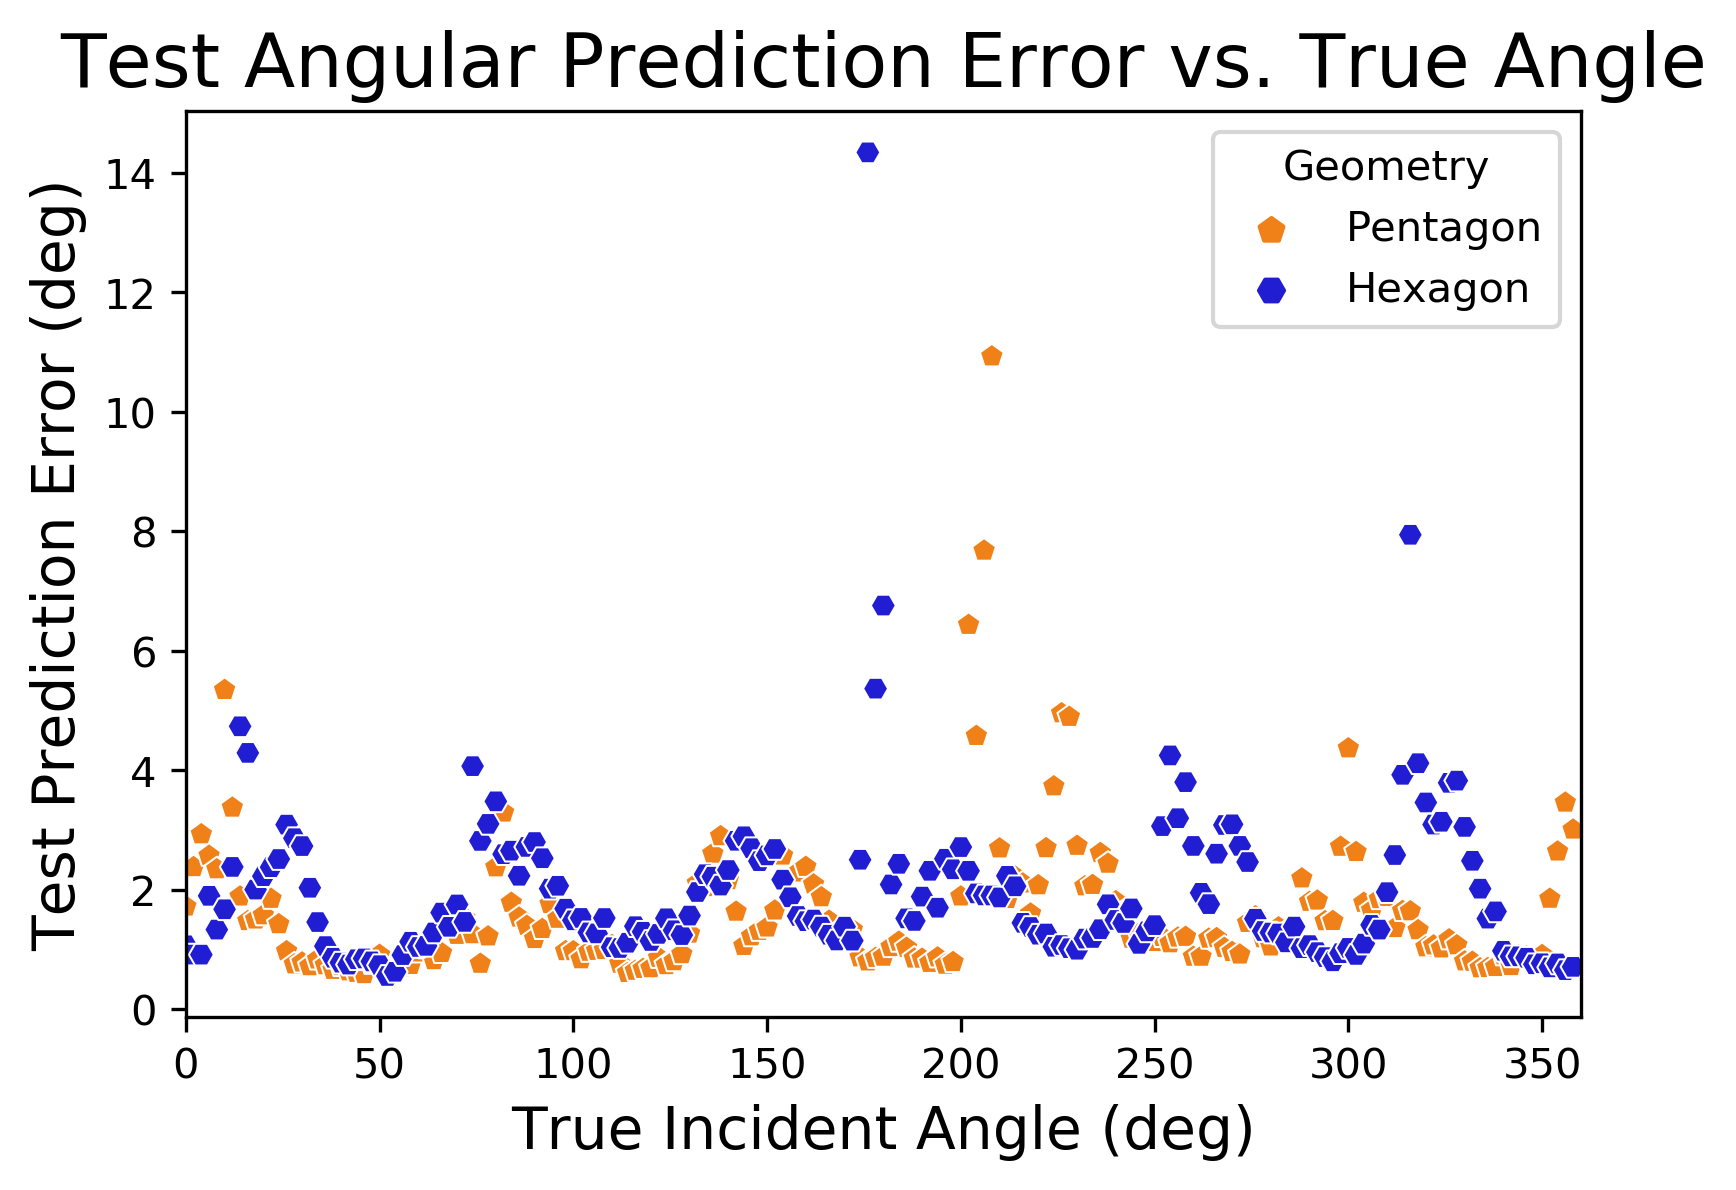

In [3]:
plt.figure(figsize=(6, 4), dpi=300)
titleFont=18
axisFont=14
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])
ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#f08119', '#201dd3'], markers=['p', 'H'], data=DF2[(DF2.Geometry.isin(['Pentagon', 'Hexagon'])) & (DF2.N == 1)])
plt.title('Test Angular Prediction Error vs. True Angle', fontsize=titleFont)
ax.set_xlabel('True Incident Angle (deg)', fontsize=axisFont)
plt.xlim([0, 360])
ax.set_ylabel('Test Prediction Error (deg)', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('ErrorVSAngle.png')
plt.show()


In [16]:
DFN = pd.DataFrame()
DFN0 = pd.DataFrame()
DFNN = pd.DataFrame()
DFN1 = DF2[(DF2.Geometry.isin(['Pentagon'])) & (DF2.N == 1)]
DFN2 = DF2[(DF2.Geometry.isin(['Hexagon'])) & (DF2.N == 1)]

print(DFN1)
print(DFN2)
'''
print(DFN1)
print(DFN1.shape)
print(DFN2)
print(DFN2.shape)
'''

# breakpoint()
DFN0['Err_degA'] = pd.concat([DFN1['Err_deg'].iloc[-3:], DFN1['Err_deg'], DFN1['Err_deg'].iloc[:4]], ignore_index=True) # DF2.Err_deg.rolling(7, min_periods=1, center=True).mean().shift(-3)
# print(DFN['Err_degA'])

DFN0['Err_degB'] = pd.concat([DFN2['Err_deg'].iloc[-3:], DFN2['Err_deg'], DFN2['Err_deg'].iloc[:4]], ignore_index=True) 
# print(DFN['Err_degB'])

DFN['Angle_deg'] = pd.concat([DFN1['Angle_deg'], (DFN1['Angle_deg'].iloc[:1]+360), DFN2['Angle_deg'], (DFN2['Angle_deg'].iloc[:1]+360)], ignore_index=True)
DFN['Geometry'] = pd.concat([DFN1['Geometry'], DFN1['Geometry'].iloc[:1], DFN2['Geometry'], DFN2['Geometry'].iloc[:1]], ignore_index=True) 
DFNN['Errs_deg'] = pd.concat([DFN0.Err_degA.rolling(7, center=True).mean(), DFN0.Err_degB.rolling(7, center=True).mean()], ignore_index=True)
print(DFNN.dropna())
DFN['Errs_deg'] = pd.concat([DFNN.dropna()], ignore_index=True)
print()
print(DFNN['Errs_deg'])
print()
print(DFN['Angle_deg'].shape)
print()
print(DFN['Angle_deg'])
print()
print(DFN['Geometry'])
print()
print(DFN['Errs_deg'])
# print(DF2['Err_deg'].shape)






     Angle_deg   Err_deg    N  Geometry
360        0.0  1.720438  1.0  Pentagon
361        2.0  2.380152  1.0  Pentagon
362        4.0  2.929616  1.0  Pentagon
363        6.0  2.570358  1.0  Pentagon
364        8.0  2.344621  1.0  Pentagon
..         ...       ...  ...       ...
535      350.0  0.909179  1.0  Pentagon
536      352.0  1.850829  1.0  Pentagon
537      354.0  2.641670  1.0  Pentagon
538      356.0  3.459738  1.0  Pentagon
539      358.0  3.008614  1.0  Pentagon

[180 rows x 4 columns]
     Angle_deg   Err_deg    N Geometry
540        0.0  1.070742  1.0  Hexagon
541        2.0  0.915653  1.0  Hexagon
542        4.0  0.914633  1.0  Hexagon
543        6.0  1.898722  1.0  Hexagon
544        8.0  1.333899  1.0  Hexagon
..         ...       ...  ...      ...
715      350.0  0.769908  1.0  Hexagon
716      352.0  0.702113  1.0  Hexagon
717      354.0  0.766942  1.0  Hexagon
718      356.0  0.655103  1.0  Hexagon
719      358.0  0.710132  1.0  Hexagon

[180 rows x 4 columns]
    

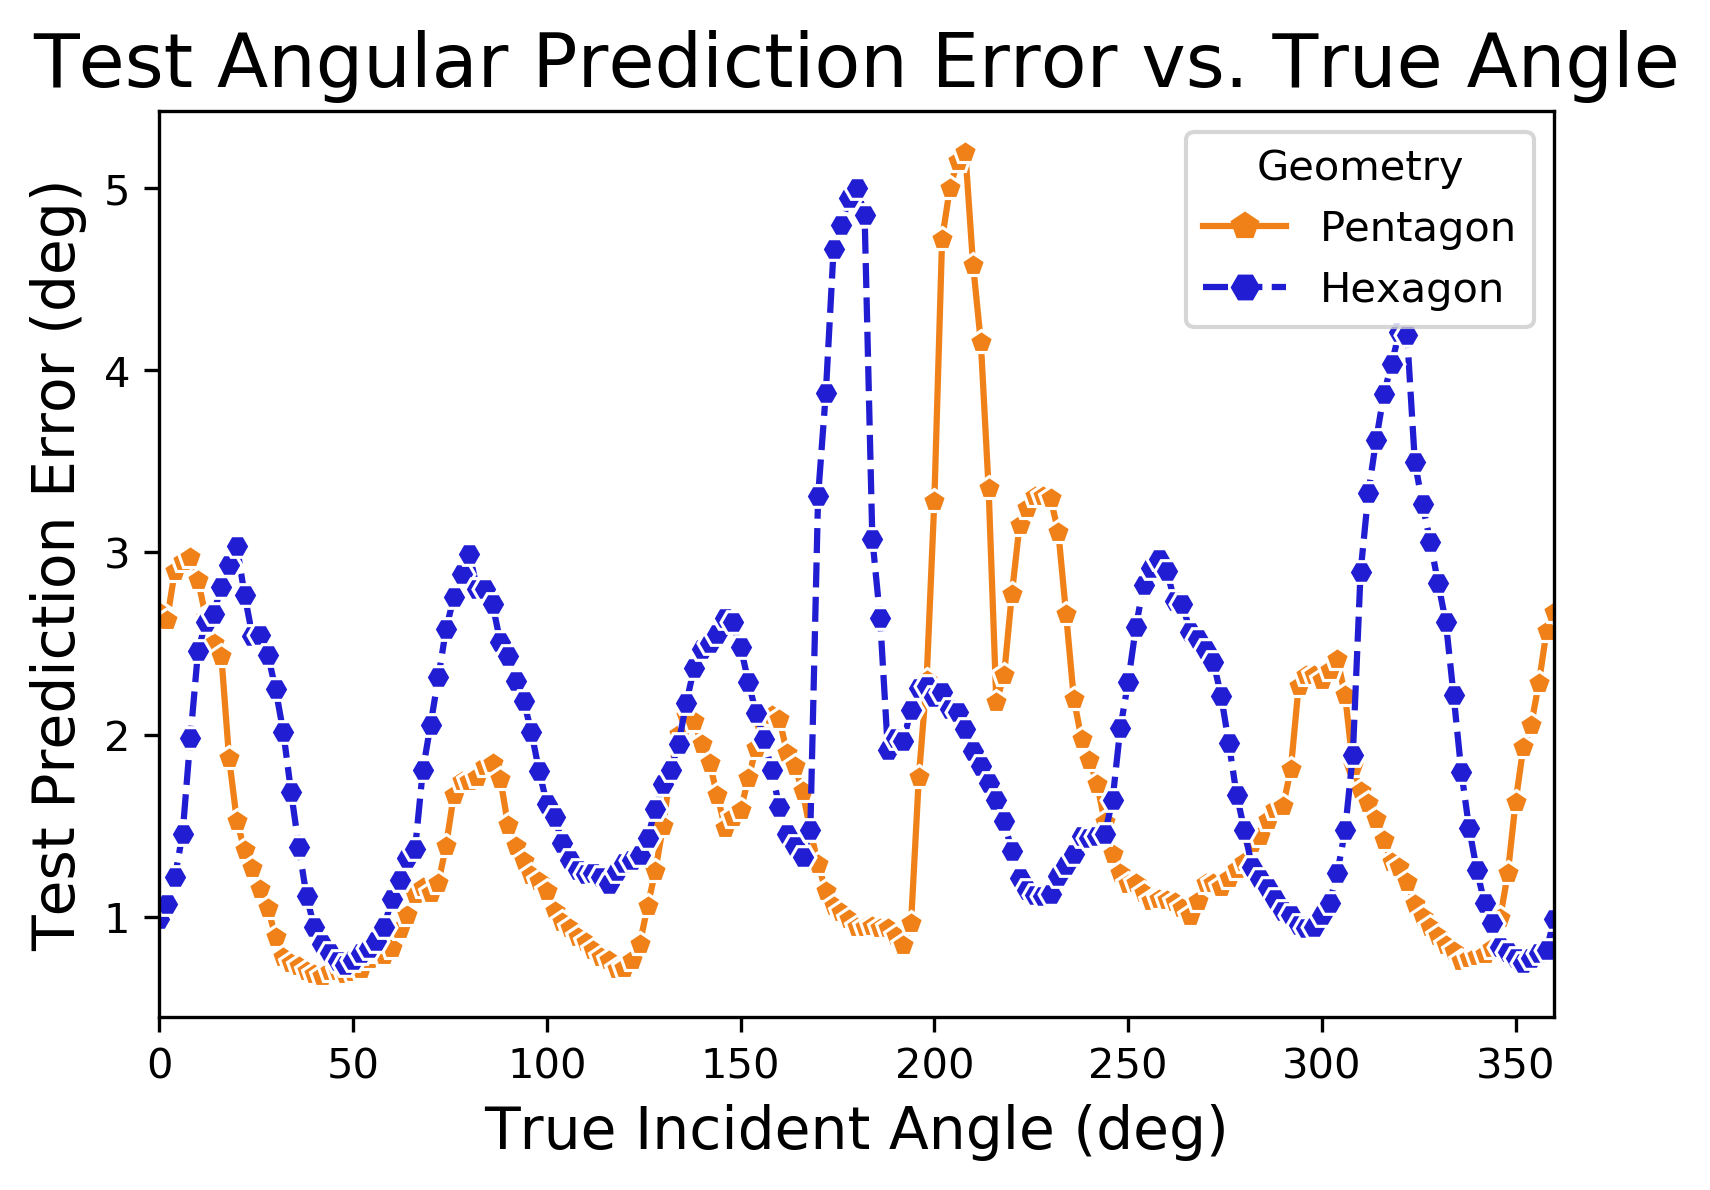

In [17]:
plt.figure(figsize=(6, 4), dpi=300)
titleFont=18
axisFont=14
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])
ax = sns.lineplot(x="Angle_deg", y="Errs_deg", hue='Geometry', style='Geometry', palette=['#f08119', '#201dd3'], markers=['p', 'H'], data=DFN)
plt.title('Test Angular Prediction Error vs. True Angle', fontsize=titleFont)
ax.set_xlabel('True Incident Angle (deg)', fontsize=axisFont)
plt.xlim([0, 360])
ax.set_ylabel('Test Prediction Error (deg)', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('ErrorVSAngleSmooth.png')
plt.show()

In [ ]:
DF0 = pd.read_csv('ErrorVSAngleLarge.csv')
DF0 = DF0.drop(columns=['Unnamed: 0'])
print(DF0)
DF = DF0
DF.loc[DF['Geometry']==3 ,'Geometry']='Triangle'
DF.loc[DF['Geometry']==4 ,'Geometry']='Square'
DF.loc[DF['Geometry']==5 ,'Geometry']='Pentagon'
DF.loc[DF['Geometry']==6 ,'Geometry']='Hexagon'
print(DF)
print(DF.columns)

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])

# As shaded, layered histogram: 
### # ax = sns.histplot(x="Err_deg", stat='probability', hue='Geometry', palette=['#e10909', '#f08119', '#201dd3'], data=DF[(DF.Geometry.isin(['Triangle', 'Pentagon', 'Hexagon'])) & (DF.N == 1)])

# As line plot via histogram (element and fill inputs adjusted from defaults)
ax = sns.histplot(x="Err_deg", stat='probability', hue='Geometry', palette=['#e10909', '#f08119', '#201dd3'], binwidth=0.0625, element='step', fill=False, data=DF[(DF.Geometry.isin(['Triangle', 'Pentagon', 'Hexagon'])) & (DF.N == 1)])

plt.title('Histogram of Prediction Error (deg) vs. Geometry', fontsize=titleFont)
ax.set_xlabel('Prediction Error (deg)', fontsize=axisFont)
plt.xlim([0, 10])
ax.set_ylabel('Probability Mass', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('ErrorHist.png')
plt.show()

In [ ]:
DF4 = DF.groupby(['Geometry', 'N']).mean()
DF3 = DF.groupby(['Geometry', 'N']).std()
print(DF4)
print()
print(DF3)
print(3455987/12)

In [ ]:
# print(DF0)
# print()
NN = [1, 2, 5]
GG = ['Triangle', 'Square', 'Pentagon', 'Hexagon']
LL = int(288000*0.95)

for ii in range(4):
    for jj in range(3):
        print('------------------------------------\n')
        print(GG[ii])
        print(NN[jj])
        print()
        DFtmp = DF[(DF.Geometry.isin([GG[ii]])) & (DF.N == NN[jj])]
        # DFtmp = DF0[(DF0.Geometry == GG[ii])]
        tmp = DFtmp["Err_deg"].to_numpy()
        print((np.sort(tmp))[LL])
        print()

In [ ]:
'''
# Process testErrs into a dataframe and condense to averages
# Order in bigData is [tri -- squ -- pent -- hex]

# Safety mechanism to not override data
if False:
    
    NN = np.array([1, 2, 5])
    lenDat = 287999
    nFilt = len(NN)
    nGeom = 4
    nSeed = 5
    dfMain = pd.DataFrame(columns=('Angle_deg', 'Err_deg', 'N', 'Geometry'))
    dfMain2 = pd.DataFrame(columns=('Angle_deg', 'Err_deg', 'N', 'Geometry'))
    for ii in range(nFilt):
        for jj in np.arange(3, 3+nGeom):
            geometryVal = jj
            tmpDAT = np.zeros((nSeed*lenDat, 5))
            bestSeed = 900.0*np.ones(nSeed)
            for kk in range(nSeed):
                if geometryVal == 3:
                    geomPath='tri/'
                    geoString = 'TRI'
                elif geometryVal == 4:
                    geomPath='squ/'
                    geoString = 'SQU'
                elif geometryVal == 5:
                    geomPath='pent/'
                    geoString = 'PENT'
                elif geometryVal == 6:
                    geomPath='hex/'
                    geoString = 'HEX'
                else:
                    raise ValueError('Geometry must be in {3, 4, 5, 6}')

                trainPath = '../compVal_N'+str(NN[ii])+'/' + geomPath + 'trainCost'+str(kk)+'.csv' 
                testPath = '../compVal_N'+str(NN[ii])+'/' + geomPath + 'testErrs'+str(kk)+'.csv'
                # testPathInit = 'compVal_N'+str(NN[ii])+'/' + geomPath + 'testCostInit'+str(kk)+'.csv'

                tmp0 = pd.read_csv(trainPath, header=None).to_numpy()
                bestSeed[kk] = tmp0[-1, 1]
                # print(tmp0[-1, 1])

                tmp = np.zeros((lenDat, 5))
                # tmp[0,:2] = pd.read_csv(testPathInit, header=None).to_numpy()
                tmp[:,:2] = pd.read_csv(testPath, header=None).to_numpy()
                tmp[:,:2] *= 180.0/math.pi
                tmp[:,0] = np.round_(tmp[:,0])
                # bestSeed[kk] = np.mean(tmp[:,1])
                tmp[:,2] = np.ones(lenDat)*NN[ii]
                tmp[:,3] = np.ones(lenDat)*geometryVal
                tmp[:,4] = np.ones(lenDat)*(kk+1)
                tmpDAT[kk*lenDat:(kk+1)*lenDat,:] = tmp


            # Choose the best seed for each geometry-filter configuration
            kkStar = np.argmin(bestSeed)
            # print(bestSeed)
            # print(f"The best seed is Seed {kkStar+1}, representing element"+ f" [{kkStar}] of bestSeed array")
            # breakpoint()

            dfTmp = pd.DataFrame(data=tmpDAT[kkStar*lenDat:(kkStar+1)*lenDat,:4],
                                 columns=('Angle_deg', 'Err_deg', 'N', 'Geometry')
                                )

            dfMain = pd.concat([dfMain, dfTmp])

            dfTmp2 = dfTmp.groupby(['Angle_deg'], as_index=False).mean()
            # print(dfTmp2.shape)
            # Append to main dataframe
            dfMain2 = pd.concat([dfMain2, dfTmp2])
            # print(dfMain.shape)


            # BIGDAT[(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + kk*lenTraj):(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + (kk+1)*lenTraj), :] = tmp

    # Save to csv file
    dfMain.to_csv('ErrorVSAngleLarge.csv')  
    dfMain2.to_csv('ErrorVSAngle.csv')  
'''